In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\Seyi\Desktop\Machine Learning\new_click_data (1).csv")
model=LogisticRegression(solver='liblinear', random_state=0)
scaler=MinMaxScaler()

In [2]:
data.head()

,age,location_region,os_name,customer_class,customer_value,spend_total,y
0,42.0,South West,android,44.0,5.0,15670.380000,0
1,20.0,South West,ios,44.0,4.0,6741.240000,0
2,28.0,South South,android,46.0,3.0,3811.180000,0
3,44.0,South West,proprietary os,184.0,3.0,3592.284065,0
4,26.0,South South,android,44.0,4.0,10139.103000,0


In [3]:
data.isnull().sum()

age                0
location_region    0
os_name            0
customer_class     0
customer_value     0
spend_total        0
y                  0
dtype: int64

In [4]:
y_column=data['y']
y_column

0          0
1          0
2          0
3          0
4          0
          ..
1064030    0
1064031    0
1064032    0
1064033    0
1064034    0
Name: y, Length: 1064035, dtype: int64

In [5]:
def column_dropper(data, column):
    data=data.drop(['y'], axis=1, inplace=True)
    return

column_dropper(data, 'y')

In [6]:
data

,age,location_region,os_name,customer_class,customer_value,spend_total
0,42.0,South West,android,44.0,5.0,15670.380000
1,20.0,South West,ios,44.0,4.0,6741.240000
2,28.0,South South,android,46.0,3.0,3811.180000
3,44.0,South West,proprietary os,184.0,3.0,3592.284065
4,26.0,South South,android,44.0,4.0,10139.103000
...,...,...,...,...,...,...
1064030,31.0,North West,android,39.0,1.0,249.791593
1064031,29.0,North East,proprietary os,46.0,1.0,159.760000
1064032,21.0,North East,proprietary os,186.0,3.0,2065.630000
1064033,29.0,North East,proprietary os,44.0,1.0,330.150000


In [7]:
def cat_values(data):
    cat_var=data.select_dtypes(exclude=['number'])
    return cat_var

cat_values(data)

,location_region,os_name
0,South West,android
1,South West,ios
2,South South,android
3,South West,proprietary os
4,South South,android
...,...,...
1064030,North West,android
1064031,North East,proprietary os
1064032,North East,proprietary os
1064033,North East,proprietary os


In [8]:
def num_values(data):
    num_var=data.select_dtypes(include=['number'])
    return num_var

num_values(data)

,age,customer_class,customer_value,spend_total
0,42.0,44.0,5.0,15670.380000
1,20.0,44.0,4.0,6741.240000
2,28.0,46.0,3.0,3811.180000
3,44.0,184.0,3.0,3592.284065
4,26.0,44.0,4.0,10139.103000
...,...,...,...,...
1064030,31.0,39.0,1.0,249.791593
1064031,29.0,46.0,1.0,159.760000
1064032,21.0,186.0,3.0,2065.630000
1064033,29.0,44.0,1.0,330.150000


In [9]:
def frequency_counts(data):
    cat_var=cat_values(data)
    for column in cat_var:
        result=data[column].value_counts()
        print(result)
        
frequency_counts(data)

South West       592209
South East       162172
South South      155263
North Central    114021
North West        26820
North East        13550
Name: location_region, dtype: int64
android           553522
proprietary os    331845
symbian os         57999
ios                34409
series30           26286
series40           20936
samsung os          9505
blackberry os       8048
mtk rtos            6618
windows phone       5821
nucleus             3216
lg os               2091
nokia os            1140
asha software        741
windows mobile       602
siemens os           341
spreadtrum os        234
belle                189
yun os                85
isa                   83
mocor os              81
tizen                 74
panasonic os          72
motomagx              52
bada                  45
Name: os_name, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

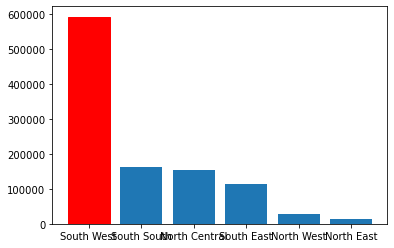

In [10]:
x=data['location_region'].unique()
y=data['location_region'].value_counts()
barchart=plt.bar(x,y)
barchart[0].set_color('r')
plt.show

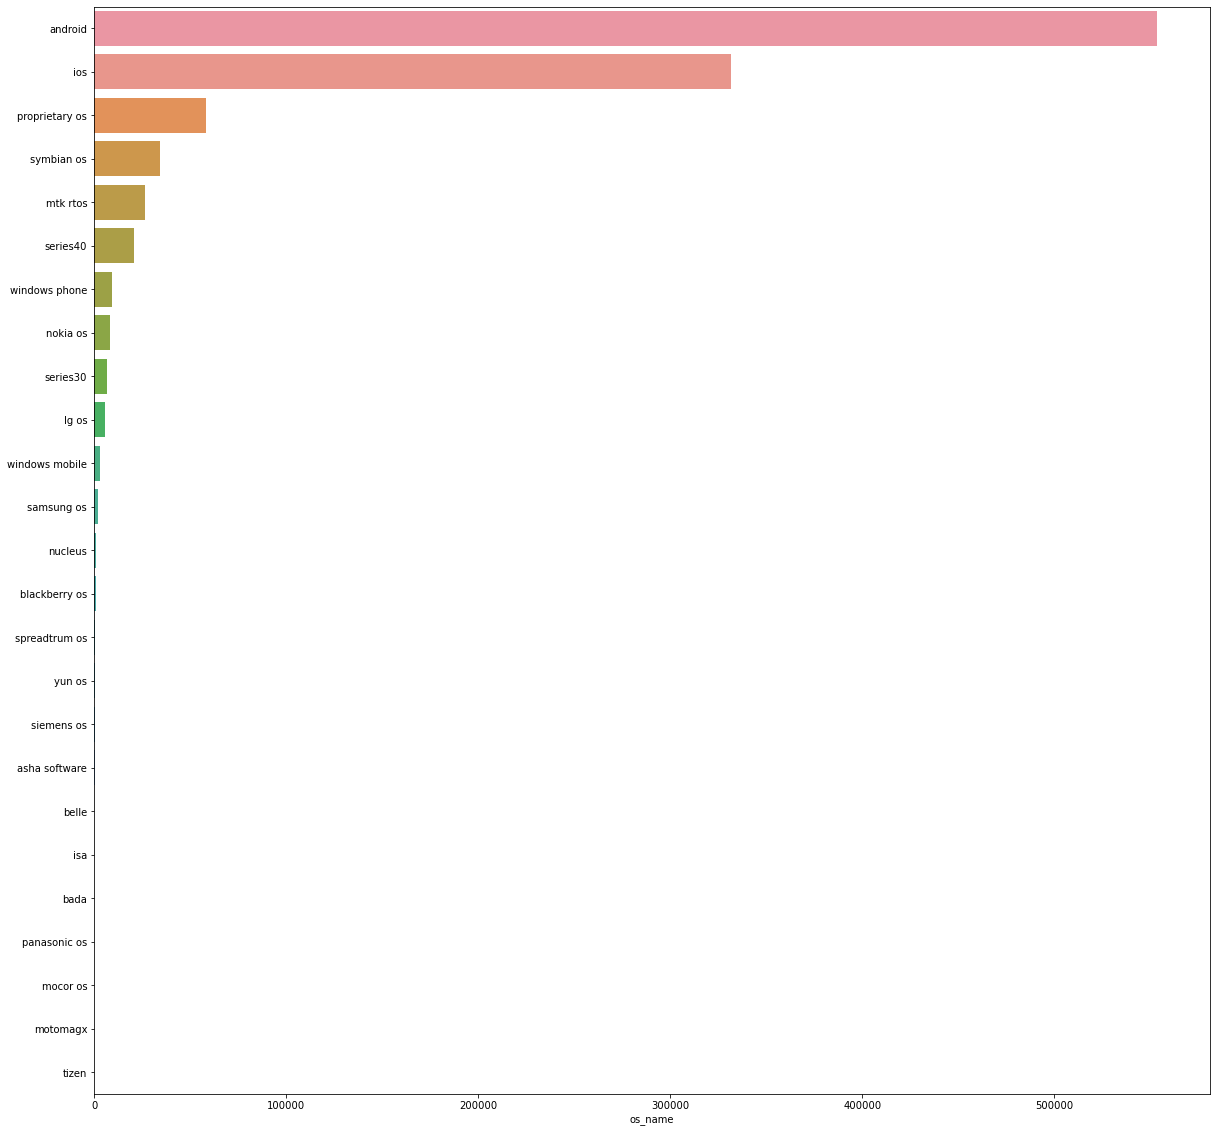

In [11]:
import seaborn as sns

x=data['os_name'].value_counts()
y=data['os_name'].unique()
fig_dims=fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x,y)


In [12]:
def corr_counts(data, primary_column):
    for column in data:
        result=data.groupby(primary_column)[column].value_counts()
        print(result)
        
corr_counts(data, 'location_region')

location_region  age 
North Central    47.0    5695
                 37.0    5530
                 32.0    5247
                 27.0    5031
                 31.0    5024
                         ... 
South West       6.0        5
                 7.0        5
                 11.0       4
                 8.0        3
                 10.0       3
Name: age, Length: 307, dtype: int64
location_region  location_region
North Central    North Central      114021
North East       North East          13550
North West       North West          26820
South East       South East         162172
South South      South South        155263
South West       South West         592209
Name: location_region, dtype: int64
location_region  os_name       
North Central    android           53904
                 proprietary os    41992
                 symbian os         4905
                 ios                3637
                 series40           2598
                                   ...  
South 

In [13]:
new_data=pd.get_dummies(data)
new_data

,age,customer_class,customer_value,spend_total,location_region_North Central,location_region_North East,location_region_North West,location_region_South East,location_region_South South,location_region_South West,...,os_name_samsung os,os_name_series30,os_name_series40,os_name_siemens os,os_name_spreadtrum os,os_name_symbian os,os_name_tizen,os_name_windows mobile,os_name_windows phone,os_name_yun os
0,42.0,44.0,5.0,15670.380000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,20.0,44.0,4.0,6741.240000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,28.0,46.0,3.0,3811.180000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,44.0,184.0,3.0,3592.284065,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,26.0,44.0,4.0,10139.103000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064030,31.0,39.0,1.0,249.791593,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1064031,29.0,46.0,1.0,159.760000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1064032,21.0,186.0,3.0,2065.630000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1064033,29.0,44.0,1.0,330.150000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
new_data_scaled=scaler.fit_transform(new_data)
new_data_scaled=pd.DataFrame(new_data_scaled, columns=new_data.columns)
new_data_scaled

,age,customer_class,customer_value,spend_total,location_region_North Central,location_region_North East,location_region_North West,location_region_South East,location_region_South South,location_region_South West,...,os_name_samsung os,os_name_series30,os_name_series40,os_name_siemens os,os_name_spreadtrum os,os_name_symbian os,os_name_tizen,os_name_windows mobile,os_name_windows phone,os_name_yun os
0,0.694915,0.023188,1.00,0.002886,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.322034,0.023188,0.75,0.001242,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.457627,0.025121,0.50,0.000702,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.728814,0.158454,0.50,0.000662,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.423729,0.023188,0.75,0.001867,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064030,0.508475,0.018357,0.00,0.000046,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1064031,0.474576,0.025121,0.00,0.000029,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1064032,0.338983,0.160386,0.50,0.000380,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1064033,0.474576,0.023188,0.00,0.000061,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
x=new_data_scaled.iloc[:,0:34]
y=y_column
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [16]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [17]:
y_pred=model.predict(x_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
846119,0,0
686532,0,0
1014185,0,0
798283,0,0
1054474,0,0
...,...,...
475715,0,0
541986,0,0
295953,0,0
125208,0,0


In [18]:
model.score(x, y)

0.9946373944466113